In [17]:
import pandas as pd
import numpy as np

In [2]:
from pathlib import Path

In [3]:
dPath = Path("../docs/dumps")

In [4]:
import pickle

In [5]:
with open(dPath / "train_data.pkl", 'rb') as filename:
    train_data = pickle.load(filename)

In [6]:
with open(dPath / "valid_data.pkl", 'rb') as filename:
    valid_data = pickle.load(filename)

In [7]:
X_train = train_data.drop("Detected", axis=1)

In [8]:
y_train = train_data.Detected

In [9]:
X_valid = valid_data.drop("Detected", axis=1)

In [10]:
y_valid = valid_data.Detected

In [11]:
with open(dPath / "rf_exp_02_names.pkl", 'rb') as filename:
    names = pickle.load(filename)

In [12]:
X_train = X_train[names] 

In [13]:
X_valid = X_valid[names]

In [14]:
X_train.head()

,numExecuted,MutatorClass,numAssertInTC,numTestCover,numAssertInTM,ppavcc,cchalsteadCumulativeBugs,cchalsteadCumulativeVolume,ppRVF,ppnumberOfMethods,...,cchalsteadEffort,ccmaintainabilityIndexNC,mmhalsteadVocabulary,pptcc,mmexternalMethodsCalled,ppinstability,ppmaxcc,mmhalsteadEffort,mmvariablesReferenced,ccunweightedClassSize
0,14,2,14,1,7,2.125,0.593518,1780.554266,13.0,16.0,...,32644.005473,99.687474,21.0,34.0,1.0,0.666667,5.0,2782.972319,3.0,4.0
1,14,6,14,1,7,2.125,0.593518,1780.554266,13.0,16.0,...,32644.005473,99.687474,21.0,34.0,1.0,0.666667,5.0,2782.972319,3.0,4.0
2,14,6,14,1,7,2.125,0.593518,1780.554266,13.0,16.0,...,32644.005473,99.687474,21.0,34.0,1.0,0.666667,5.0,2782.972319,3.0,4.0
3,14,0,14,1,7,2.125,0.593518,1780.554266,13.0,16.0,...,32644.005473,99.687474,21.0,34.0,1.0,0.666667,5.0,2782.972319,3.0,4.0
4,14,0,14,1,7,2.125,0.593518,1780.554266,13.0,16.0,...,32644.005473,99.687474,21.0,34.0,1.0,0.666667,5.0,2782.972319,3.0,4.0


In [20]:
import scipy.stats
from scipy.cluster import hierarchy as hc
import matplotlib.pyplot as plt

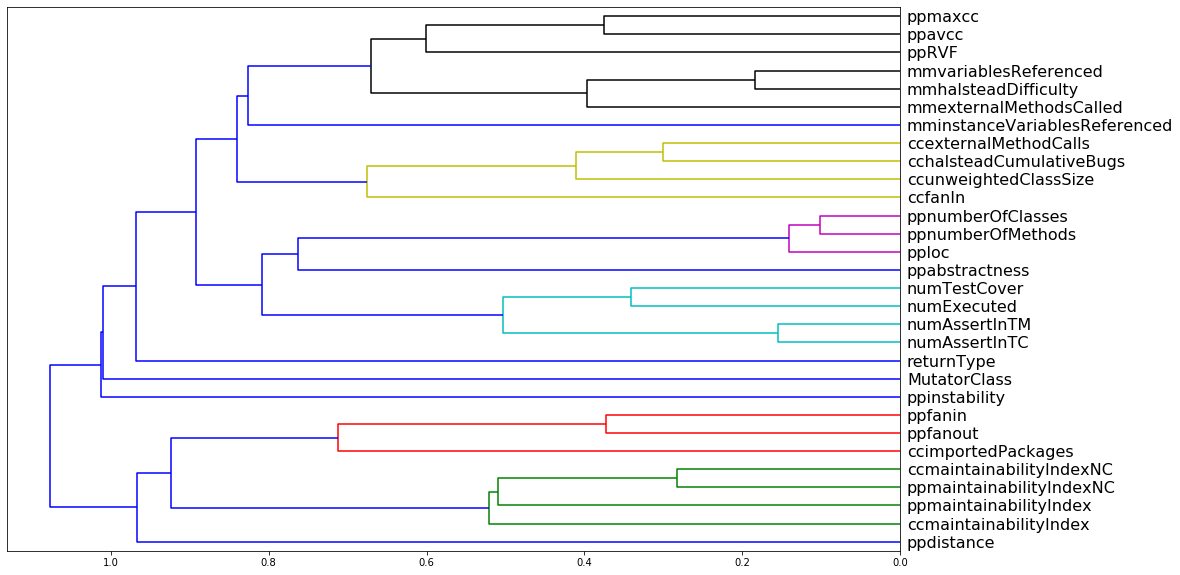

In [61]:
corr = np.round(scipy.stats.spearmanr(X_train).correlation, 4)
corr_condensed = hc.distance.squareform(1-corr)
z = hc.linkage(corr_condensed, method='average')
fig = plt.figure(figsize=(16,10))
dendrogram = hc.dendrogram(z, labels=X_train.columns, orientation='left', leaf_font_size=16)
plt.show()

In [62]:
z

array([[ 8.        ,  9.        ,  0.1019    ,  2.        ],
       [23.        , 30.        ,  0.1403    ,  3.        ],
       [ 2.        ,  4.        ,  0.1546    ,  2.        ],
       [13.        , 28.        ,  0.1839    ,  2.        ],
       [10.        , 24.        ,  0.2829    ,  2.        ],
       [ 6.        , 16.        ,  0.2999    ,  2.        ],
       [ 0.        ,  3.        ,  0.3415    ,  2.        ],
       [11.        , 22.        ,  0.3729    ,  2.        ],
       [ 5.        , 27.        ,  0.3754    ,  2.        ],
       [25.        , 33.        ,  0.39635   ,  3.        ],
       [29.        , 35.        ,  0.4111    ,  3.        ],
       [32.        , 36.        ,  0.503125  ,  4.        ],
       [15.        , 34.        ,  0.50945   ,  3.        ],
       [12.        , 42.        ,  0.5214    ,  4.        ],
       [ 7.        , 38.        ,  0.60075   ,  3.        ],
       [39.        , 44.        ,  0.67082222,  6.        ],
       [21.        , 40.

In [26]:
from sklearn.ensemble import RandomForestClassifier

In [27]:
rf = RandomForestClassifier(n_estimators=20, max_features=0.5, oob_score=True, random_state=42, n_jobs=-1)

In [54]:
X_train.drop(['mmnumberOfExpressions'], axis=1,inplace=True)

In [55]:
X_valid.drop(['mmnumberOfExpressions'], axis=1,inplace=True)

In [56]:
%time rf.fit(X_train, y_train)

Wall time: 45 s


C:\Users\Alireza\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Alireza\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=0.5,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=-1,
                       oob_score=True, random_state=42, verbose=0,
                       warm_start=False)

In [44]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

In [45]:
def print_score(m):
    res = [m.score(X_train, y_train), m.score(X_valid, y_valid), roc_auc_score(y_valid, m.predict(X_valid))]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

In [46]:
def conf_matr(m):
    y_pred = m.predict(X_valid)
    print(classification_report(y_valid, y_pred))

In [57]:
print_score(rf)

[0.9223988593622079, 0.7429921773142112, 0.5446785829854763, 0.846868189890089]


In [58]:
conf_matr(rf)

              precision    recall  f1-score   support

       False       0.44      0.15      0.23     16657
        True       0.77      0.94      0.85     50839

    accuracy                           0.74     67496
   macro avg       0.61      0.54      0.54     67496
weighted avg       0.69      0.74      0.69     67496



In [64]:
with open(dPath / "rf_exp_03.pkl", 'wb') as filename:
    pickle.dump(rf,filename)

In [59]:
names = X_train.columns

In [50]:
feat_importances = pd.Series(rf.feature_importances_, index=names)
feat_importances.sort_values(ascending=False,inplace=True)

In [60]:
feat_importances

numExecuted                      0.120864
MutatorClass                     0.106782
numAssertInTC                    0.074692
numAssertInTM                    0.050178
cchalsteadCumulativeBugs         0.044208
ppavcc                           0.041874
numTestCover                     0.039487
mmhalsteadDifficulty             0.036803
mmnumberOfExpressions            0.035592
ppmaxcc                          0.031525
ppnumberOfMethods                0.030909
ppmaintainabilityIndexNC         0.025194
ccmaintainabilityIndex           0.023816
mmvariablesReferenced            0.023152
ccmaintainabilityIndexNC         0.022815
ppinstability                    0.021580
ppRVF                            0.021372
pploc                            0.021305
ccunweightedClassSize            0.020806
ccexternalMethodCalls            0.020449
ppnumberOfClasses                0.020050
mmexternalMethodsCalled          0.019684
ppmaintainabilityIndex           0.019589
mminstanceVariablesReferenced    0

In [65]:
with open(dPath / "rf_exp_03_names.pkl", 'wb') as filename:
    pickle.dump(names,filename)